In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading car dekho csv file

In [2]:
df = pd.read_csv("cardekho_data.csv")

### Overview of data

In [3]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
237,creta,2015,11.25,13.60,68000,Diesel,Dealer,Manual,0
115,Royal Enfield Classic 350,2015,1.11,1.47,17500,Petrol,Individual,Manual,0
273,jazz,2010,2.25,7.50,61203,Petrol,Dealer,Manual,0
262,amaze,2015,4.00,5.80,40023,Petrol,Dealer,Manual,0
188,Hero Glamour,2013,0.25,0.57,18000,Petrol,Individual,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.shape

(301, 9)

In [6]:
df.size

2709

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df[df.duplicated() == True]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [10]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [11]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
df.Owner.unique()

array([0, 1, 3], dtype=int64)

### Preprocessing

In [13]:
df.shape

(301, 9)

In [14]:
df.drop_duplicates(keep='first', inplace = True )

In [15]:
df.shape

(299, 9)

### Analysis

#### Q1. What is the distribution of car prices (both selling price and present price)?

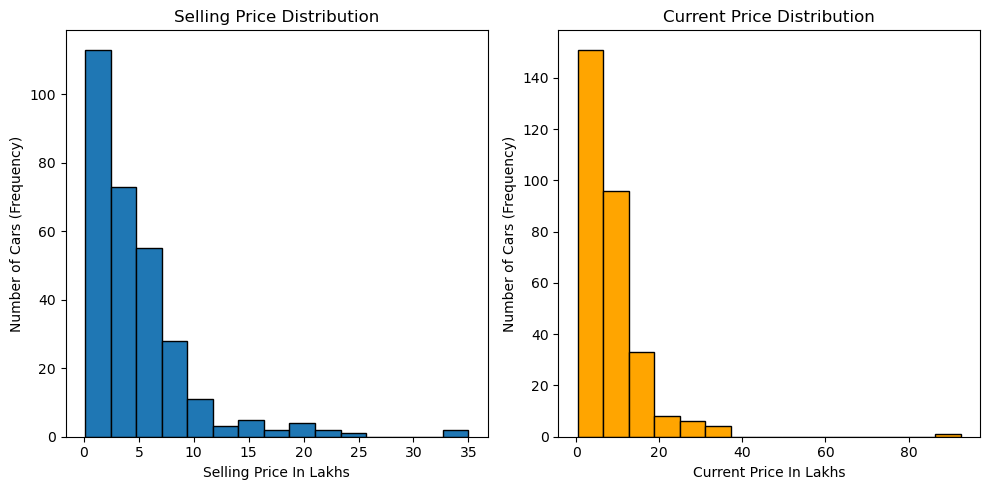

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(df.Selling_Price, bins=15, edgecolor='black')
axes[0].set_title('Selling Price Distribution')
axes[0].set_xlabel('Selling Price In Lakhs')
axes[0].set_ylabel('Number of Cars (Frequency)')

axes[1].hist(df.Present_Price, bins=15, edgecolor='black', color='orange')
axes[1].set_title('Current Price Distribution')
axes[1].set_xlabel('Current Price In Lakhs')
axes[1].set_ylabel('Number of Cars (Frequency)')

plt.tight_layout()
plt.show()

#### Q2. What is the distribution of the number of kilometers driven?

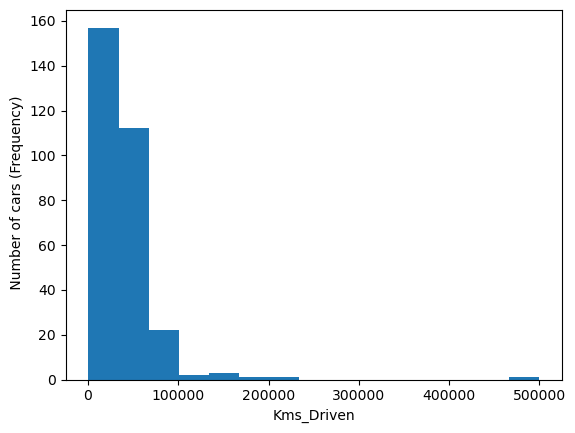

In [17]:
plt.hist(df.Kms_Driven,bins=15) 
plt.xlabel("Kms_Driven") 
plt.ylabel(" Number of cars (Frequency)") 
plt.show()

#### Q3. What are the most common car types (Car_Name)?

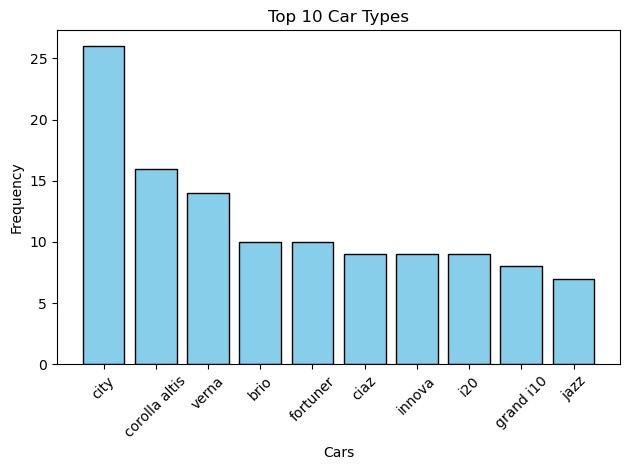

In [18]:

car_counts = df.Car_Name.value_counts().head(10)
cars = car_counts.index  
plt.bar(cars, car_counts, color='skyblue', edgecolor='black')
plt.xlabel("Cars")
plt.ylabel("Frequency")
plt.title("Top 10 Car Types")
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


#### Q4. How many different fuel types are there, and what is the distribution of cars by fuel type?

In [19]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

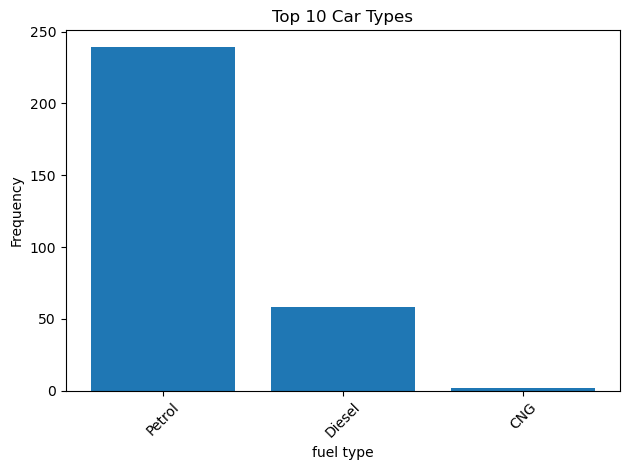

In [20]:
fuel_counts = df.Fuel_Type.value_counts()
 
plt.bar(df.Fuel_Type.unique(),fuel_counts)
plt.xlabel("fuel type")
plt.ylabel("Frequency")
plt.title("Top 10 Car Types")
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


#### Q5. What is the relationship between the car's present price and its selling price?

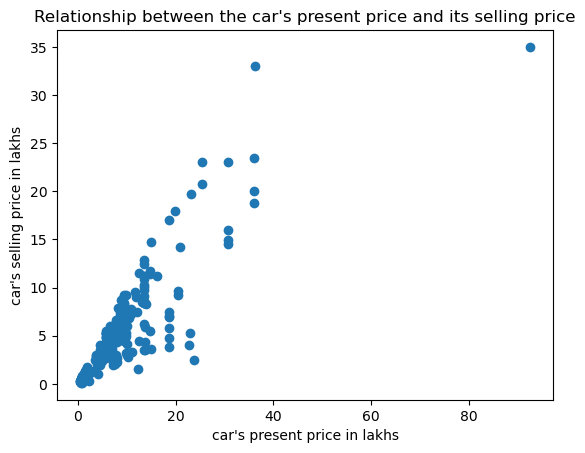

In [27]:
plt.scatter(df.Present_Price,df.Selling_Price)
plt.xlabel("car's present price in lakhs")
plt.ylabel("car's selling price in lakhs")
plt.title("Relationship between the car's present price and its selling price")
plt.show()

In [21]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Q6. How does the number of kilometers driven affect the selling price of the car?

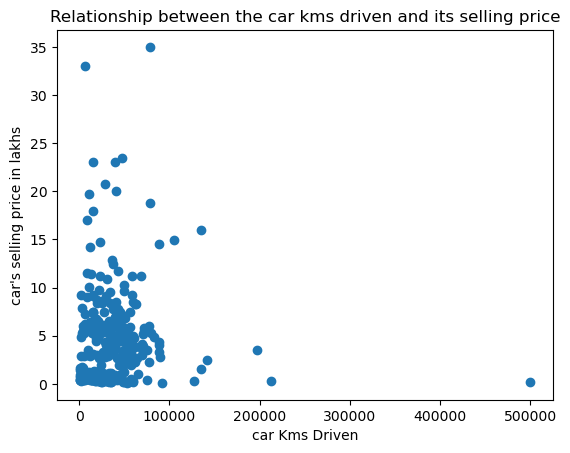

In [29]:
plt.scatter(df.Kms_Driven,df.Selling_Price)
plt.xlabel("car Kms Driven")
plt.ylabel("car's selling price in lakhs")
plt.title("Relationship between the car kms driven and its selling price")
plt.show()

#### Q7. Which fuel type has the highest average selling price?

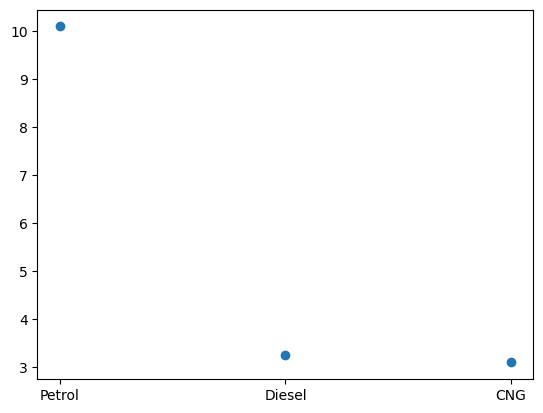

In [36]:
d = df[df.Fuel_Type == "Diesel"]
avg_d = d.Selling_Price.mean()
p = df[df.Fuel_Type == "Petrol"]
avg_p = p.Selling_Price.mean()
c = df[df.Fuel_Type == "CNG"]
avg_c = c.Selling_Price.mean()


plt.scatter(df.Fuel_Type.unique(),[avg_d,avg_p,avg_c])
plt.show()

#### Q8. Distribution of cars sold by seller type (Individual/Dealer)

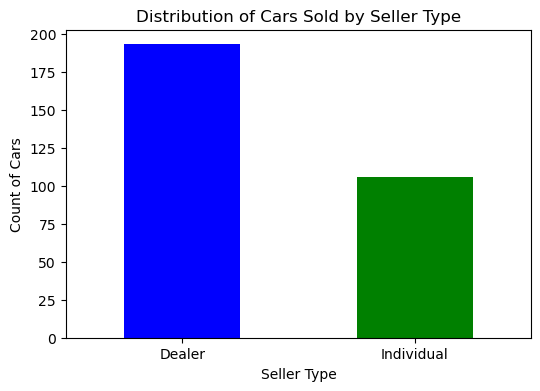

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

seller_type_count = df['Seller_Type'].value_counts()

plt.figure(figsize=(6, 4))
seller_type_count.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Cars Sold by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Count of Cars')
plt.xticks(rotation=0)
plt.show()


#### Q9. Impact of ownership on selling price

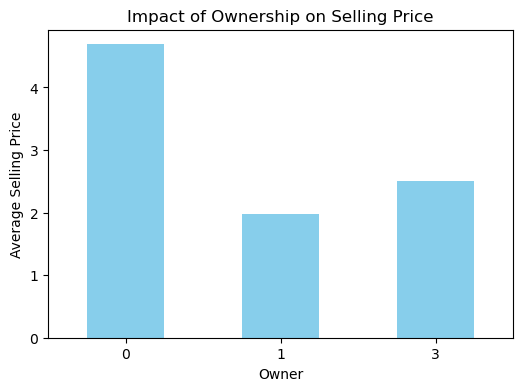

In [39]:
# Group by 'Owner' and calculate the average selling price for each group
owner_avg_price = df.groupby('Owner')['Selling_Price'].mean()

# Plotting the impact of ownership on selling price
plt.figure(figsize=(6, 4))
owner_avg_price.plot(kind='bar', color='skyblue')
plt.title('Impact of Ownership on Selling Price')
plt.xlabel('Owner')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.show()


#### Q10. Average selling price of cars for each year

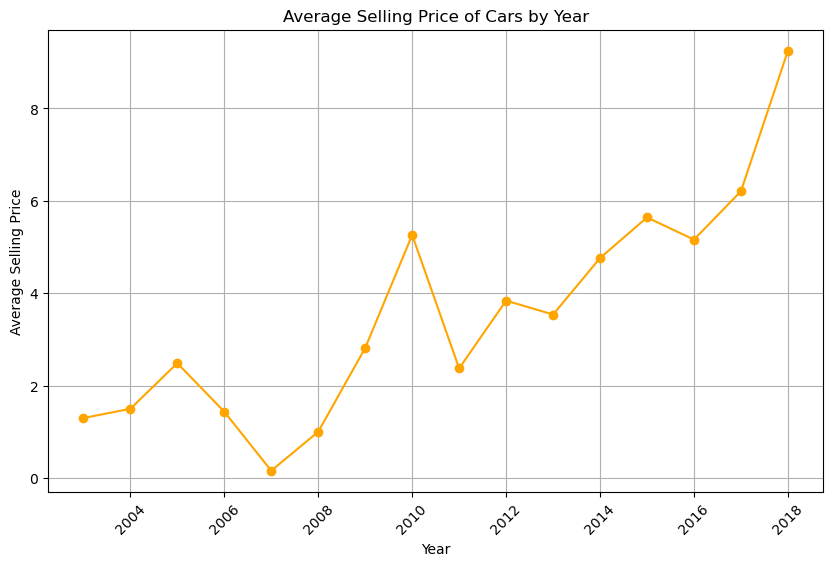

In [40]:
# Group by 'Year' and calculate the average selling price for each year
year_avg_price = df.groupby('Year')['Selling_Price'].mean()

# Plotting the average selling price of cars for each year
plt.figure(figsize=(10, 6))
year_avg_price.plot(kind='line', marker='o', color='orange')
plt.title('Average Selling Price of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Q11. Comparison of kilometers driven by fuel type

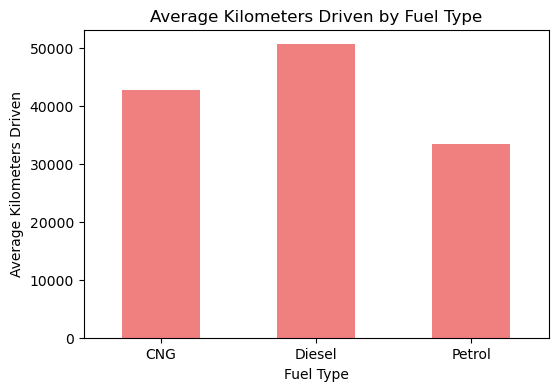

In [41]:
# Group by 'Fuel_Type' and calculate the average kilometers driven for each fuel type
fuel_kms = df.groupby('Fuel_Type')['Kms_Driven'].mean()

# Plotting the comparison of kilometers driven by fuel type
plt.figure(figsize=(6, 4))
fuel_kms.plot(kind='bar', color='lightcoral')
plt.title('Average Kilometers Driven by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=0)
plt.show()


#### Q12. Correlation between car age (based on the year) and selling price

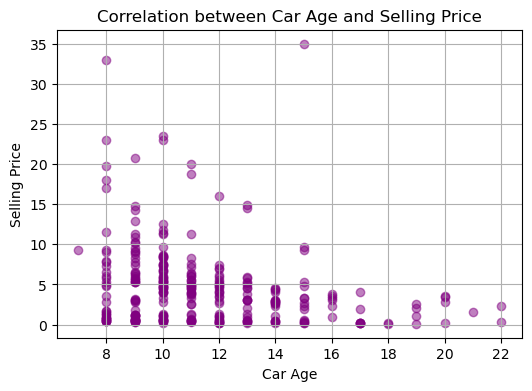

In [42]:
# Calculate car age (current year - car year)
df['Car_Age'] = 2025 - df['Year']  # assuming current year is 2025

# Plotting the correlation between car age and selling price
plt.figure(figsize=(6, 4))
plt.scatter(df['Car_Age'], df['Selling_Price'], color='purple', alpha=0.5)
plt.title('Correlation between Car Age and Selling Price')
plt.xlabel('Car Age')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


#### Q13. Median selling price of cars for each fuel type

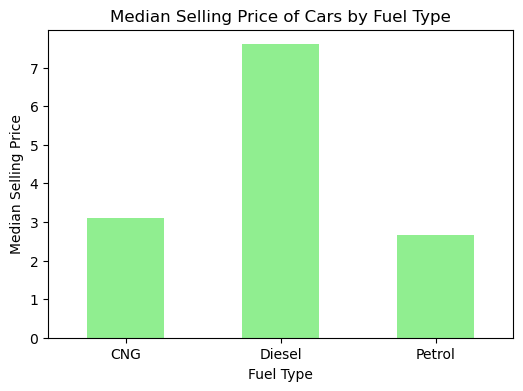

In [43]:
# Group by 'Fuel_Type' and calculate the median selling price for each fuel type
fuel_median_price = df.groupby('Fuel_Type')['Selling_Price'].median()

# Plotting the median selling price by fuel type
plt.figure(figsize=(6, 4))
fuel_median_price.plot(kind='bar', color='lightgreen')
plt.title('Median Selling Price of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Median Selling Price')
plt.xticks(rotation=0)
plt.show()


#### Q14. Outliers in selling price based on kilometers driven

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 393.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 798.9 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 980.4 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00


C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_23856\860667657.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Kms_Driven', y='Selling_Price', data=df, palette='coolwarm')


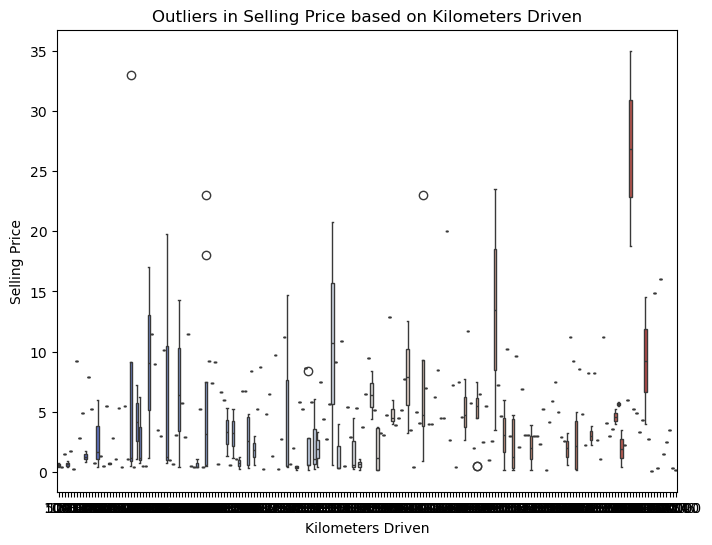

In [47]:
!pip install seaborn
import seaborn as sns

# Plotting a boxplot to detect outliers in selling price based on kilometers driven
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kms_Driven', y='Selling_Price', data=df, palette='coolwarm')
plt.title('Outliers in Selling Price based on Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()


#### Q15. Relationship between present price and seller type

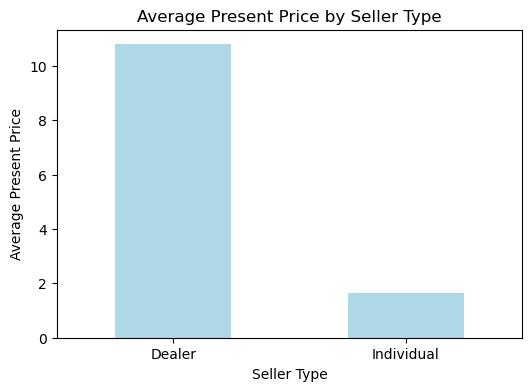

In [48]:
# Group by 'Seller_Type' and calculate the average present price for each seller type
seller_type_avg_price = df.groupby('Seller_Type')['Present_Price'].mean()

# Plotting the relationship between present price and seller type
plt.figure(figsize=(6, 4))
seller_type_avg_price.plot(kind='bar', color='lightblue')
plt.title('Average Present Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Present Price')
plt.xticks(rotation=0)
plt.show()
